<a href="https://colab.research.google.com/github/roobyyi/Data-Scientist-Practicum-Project/blob/main/Integrated%20Project%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ekstrasi Emas

Diberikan data tentang proses ekstraksi emas, proses ekstraksi emas ini melewati 2 tahapan, pertama adalah Flotation dan kedua adalah Purification.

1. Flotation, Merupakan tahap dimana biji emas mentah akan dicampurkan bersama bahan bahan yang lainnya sehingga nantinya emas akan menjadi hidrofobik (bersifat tahan air, atau ingin berpisah dengan air) dan lambat laun emas yang sudah menjadi hidrofobik akan mengapung ke permukaan dengan bantuan gelembung udara yang dialirkan. Sedangkan mineral lain yang yang tidak memiliki sifat hidrofobik tetap akan didalam air. 

2. Purification, atau disebut pemurnian, hal ini dilakukan untuk memurnikan emas agar tidak tercampur dengan mineral lain, proses ini dilakukan sebanyak dua kali. Dan setelah proses ini dilakukan, maka emas yang memiliki konsentrasi tinggi akan terpisah dengan emas yang konsentrasinya rendah. Emas dengan konsentrasi rendah ini (yang masih tercampur dengan berbagai metal lainnya) akan masuk ke bagian "rougher tails".

Untuk tambahan informasi, dalam biji emas, bisa terdapat Emas (Au), Timbal (Pb), Perak (Ag), dan mineral mineral lainnya. Dalam dataset ini, mineral mineral lain yang disebutkan yang memiliki sifat hidrofilik (bisa bersatu dengan air) dinamakan sol.

Jadi proyek kali ini, yang akan jadikan target prediksi adalah final output dari emas (Au) dengan konsentrasi tinggi yang sudah melewati seleksi flotation yang diberi nama kolom final.output.recovery dan residue dari proses ini yang mengandung emas (Au) dengan konsentrasi rendah dan diberi nama kolom rougher.output.recovery.

<h1>Daftar Isi<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Checking--&amp;-Preparation" data-toc-modified-id="Data-Checking--&amp;-Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Checking  &amp; Preparation</a></span><ul class="toc-item"><li><span><a href="#Library-Importation" data-toc-modified-id="Library-Importation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Library Importation</a></span></li><li><span><a href="#Data-Checking" data-toc-modified-id="Data-Checking-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Checking</a></span></li><li><span><a href="#Data-Correction" data-toc-modified-id="Data-Correction-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Correction</a></span></li><li><span><a href="#Features-Checking" data-toc-modified-id="Features-Checking-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Features Checking</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Train-Dataset" data-toc-modified-id="Train-Dataset-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Train Dataset</a></span></li><li><span><a href="#Test-Dataset" data-toc-modified-id="Test-Dataset-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Test Dataset</a></span></li><li><span><a href="#Full-Dataset" data-toc-modified-id="Full-Dataset-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Full Dataset</a></span></li></ul></li></ul></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Metal-Concentration" data-toc-modified-id="Metal-Concentration-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Metal Concentration</a></span><ul class="toc-item"><li><span><a href="#Aurum-('Au',-Emas)" data-toc-modified-id="Aurum-('Au',-Emas)-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Aurum ('Au', Emas)</a></span></li><li><span><a href="#Argentum-('Ag',-Perak)" data-toc-modified-id="Argentum-('Ag',-Perak)-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Argentum ('Ag', Perak)</a></span></li><li><span><a href="#Plumbum-('Pb',-Timbal)" data-toc-modified-id="Plumbum-('Pb',-Timbal)-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Plumbum ('Pb', Timbal)</a></span></li></ul></li><li><span><a href="#Training-&amp;-Test-Dataset-Data-Distribution" data-toc-modified-id="Training-&amp;-Test-Dataset-Data-Distribution-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Training &amp; Test Dataset Data Distribution</a></span></li><li><span><a href="#Concentration-Distribution-on-Different-Stages" data-toc-modified-id="Concentration-Distribution-on-Different-Stages-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Concentration Distribution on Different Stages</a></span></li><li><span><a href="#Eliminating-Anomalies" data-toc-modified-id="Eliminating-Anomalies-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Eliminating Anomalies</a></span></li></ul></li><li><span><a href="#Machine-Learning-Modelling" data-toc-modified-id="Machine-Learning-Modelling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Machine Learning Modelling</a></span><ul class="toc-item"><li><span><a href="#Features-and-Target-Settings" data-toc-modified-id="Features-and-Target-Settings-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Features and Target Settings</a></span></li><li><span><a href="#Metric-Evaluation" data-toc-modified-id="Metric-Evaluation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Metric Evaluation</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li><li><span><a href="#Model-Terbaik" data-toc-modified-id="Model-Terbaik-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Model Terbaik</a></span></li><li><span><a href="#Sanity-Check" data-toc-modified-id="Sanity-Check-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Sanity Check</a></span></li></ul></li></ul></div>

## Data Checking  & Preparation

Sebelum memproses data, hal yang pertama dilakukan adalah mengecek data dan mempersiapkan hal yang akan dibutuhkan.

### Library Importation

Pertama import library yang akan digunakan

In [ ]:
#assisting libraries
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

#max_columns display
pd.set_option('display.max_columns', 100)

#model
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#cross_val scorer
from sklearn.model_selection import KFold

#sanity check
from sklearn.dummy import DummyRegressor

### Data Checking

Selanjutnya adalah mengecek data yang disediakan, apakah sudah bisa digunakan dengan baik atau masih bermasalah. Untuk mempermudah, kolom date bisa diganti tipe datanya menjadi date time dengan menggunakan parse_dates pada fungsi read_csv.

In [ ]:
train = pd.read_csv('/datasets/gold_recovery_train.csv', parse_dates = ['date'])
test = pd.read_csv('/datasets/gold_recovery_test.csv', parse_dates = ['date'])
full = pd.read_csv('/datasets/gold_recovery_full.csv', parse_dates = ['date'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16788 non-null  float64       
 2   final.output.concentrate_pb                         16788 non-null  float64       
 3   final.output.concentrate_sol                        16490 non-null  float64       
 4   final.output.concentrate_au                         16789 non-null  float64       
 5   final.output.recovery                               15339 non-null  float64       
 6   final.output.tail_ag                                16794 non-null  float64       
 7   final.output.tail_pb                                16677 non-null  float64       
 8   final.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5554 non-null   float64       
 2   primary_cleaner.input.depressant            5572 non-null   float64       
 3   primary_cleaner.input.feed_size             5856 non-null   float64       
 4   primary_cleaner.input.xanthate              5690 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64       
 9   primary_

In [ ]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                22716 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         22627 non-null  float64       
 2   final.output.concentrate_pb                         22629 non-null  float64       
 3   final.output.concentrate_sol                        22331 non-null  float64       
 4   final.output.concentrate_au                         22630 non-null  float64       
 5   final.output.recovery                               20753 non-null  float64       
 6   final.output.tail_ag                                22633 non-null  float64       
 7   final.output.tail_pb                                22516 non-null  float64       
 8   final.

Ternyata masih banyak nilai null yang terdapat pada dataset.

### Data Correction

Sebelum memperbaiki nilai null, data correction akan dilakukan terlebih dahulu. Hal ini dilakukan untuk mengukur seberapa akurat data yang disediakan (bisa jadi hasil pengambilan data lapangan) dengan data hasil simulasi(teori, dengan memasukkan berbagai input kedalam persamaan matematika nya).

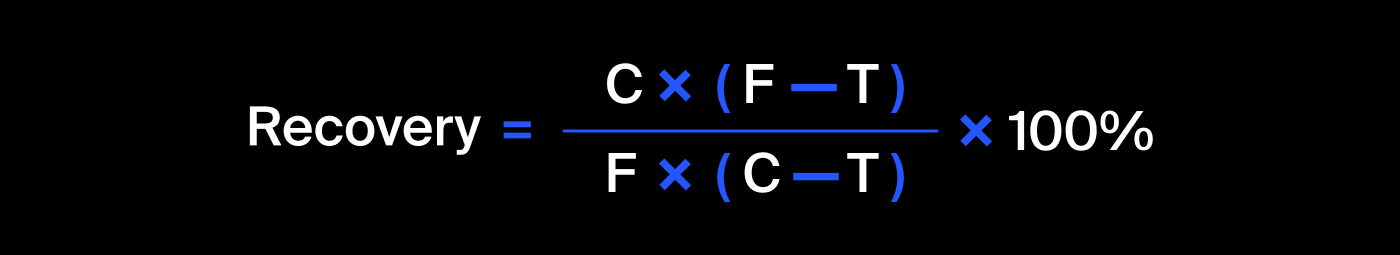

In [ ]:
simulation = pd.DataFrame()

In [ ]:
simulation = train

In [ ]:
C = simulation['rougher.output.concentrate_au']
F = simulation['rougher.input.feed_au']
T = simulation['rougher.output.tail_au']

In [ ]:
simulation['simulation'] = ((C*(F-T))/(F*(C-T)))*100


In [ ]:
mae_rough_recovery = (simulation['simulation'] - simulation['rougher.output.recovery']).abs().mean()
print(f'Mean Absolute Error dari rough recovery adalah {mae_rough_recovery}')

Mean Absolute Error dari rough recovery adalah 9.303415616264301e-15


In [ ]:
simulation['simulation'].mean()

nan

In [ ]:
simulation['rougher.output.recovery'].mean()

82.39420120842001

MAE yang dihasilkan sangat kecil, nilainya bagus berarti perhitungan yang digunakan telah benar.

### Features Checking

Ada beberapa kolom yang tidak di sediakan dalam dataset test.

In [ ]:
train_only_columns = []
for columns in list(train.columns.values):
    if columns not in (test.columns.values):
        train_only_columns.append(columns)
train_only_columns        

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Semua nama kolom yang tidak dimasukan dalam testing adalah nama nama kolom yang merupakan output dari setiap tahapan, yang mana itu merupakan hal yang bisa dibilang bukan hal yang penting untuk memprediksi target akhir yang mana final.output.recovery .

Analoginya, Kita akan memproses A1 untuk mendapatkan A10 dengan melewati berbagai tahapan yang mana dari A1 menjadi A2, A3, dan seterusnya hingga A10, dalam proses A1 menuju A10 membutuhkan B, C, D, dan E. Misalnya dari A1 kita membutuhkan B untuk menjadi A2, dan dari A2 menjadi A10 membutuhkan C, D, dan E. Dari analogi tersebut, bisa disimpulkan bahwa kita sebenarnya hanya membutuhkan input berupa A1, B, C, D, dan E. A2, A3, A4, dan seterusnya hingga A10 hanyalah hasil dari proses A1 dengan B, C, D, dan E.

Begitupula dengan kolom kolom yang tidak ada di test namun ada di train. Bisa kita anggap bahwa kolom yang tidak ada di dataset test adalah kolom yang merupakan hasil dari proses A1 menuju A10 yaitu A2, A3, A4 dan seterusnya. Nah untuk A1 nya sendiri adalah input awalnya yaitu biji emas nya, dan B, C, D dan E nya adalah Xanthate, Sulphate, Depressant, dan hal hal lain dari luar yang mempengaruhi proses ekstraksi biji emas.

Bisa disimpulkan bahwa features untuk pemodelan machine learning pada proyek ini adalah kolom yang ada di dataset test saja. Hal ini ditujukan agar features importancenya bisa diatur menjadi lebih sederhana dan tidak menyebabkan model menjadi bingung.

### Data Preprocessing

Karena terlihat masih ada nilai null, dan itu akan mengganggu proses pembuatan machine learning, maka nilai null akan di proses lebih lanjut

#### Train Dataset

In [ ]:
train.shape

(16860, 88)

In [ ]:
(train.isna().sum()/len(train)).sort_values(ascending=False)

rougher.output.recovery                               0.152610
simulation                                            0.135409
rougher.output.tail_ag                                0.133452
rougher.output.tail_au                                0.133393
rougher.output.tail_sol                               0.133393
                                                        ...   
primary_cleaner.state.floatbank8_d_level              0.001601
rougher.calculation.sulfate_to_au_concentrate         0.001601
rougher.calculation.floatbank11_sulfate_to_au_feed    0.001601
primary_cleaner.input.feed_size                       0.000000
date                                                  0.000000
Length: 88, dtype: float64

Didapatkan nilai yang hilang pada dataset ada yang mencapai 15%, sehingga untuk menghapus baris dengan nilai yang hilang bukanlah keputusan yang bijak. Di sisi lain, terlihat bahwa dataset yang diberikan sudah diurutkan berdasarkan waktu dan tanggalnya. Hal ini akan mempermudah karena ada informasi bahwa dalam proses ekstrasi emas, nilai dengan waktu yang berdekatan kurang lebihnya hampir sama, maka dari itu nilai null akan diisi dengan metode backwardfill atau forwardfill.

In [ ]:
train_wo_null = train.ffill().bfill()
(train_wo_null.isna().sum()/len(train)).sort_values(ascending=False)

date                                        0.0
final.output.concentrate_ag                 0.0
rougher.state.floatbank10_f_level           0.0
rougher.state.floatbank10_f_air             0.0
rougher.state.floatbank10_e_level           0.0
                                           ... 
primary_cleaner.state.floatbank8_c_level    0.0
primary_cleaner.state.floatbank8_c_air      0.0
primary_cleaner.state.floatbank8_b_level    0.0
primary_cleaner.state.floatbank8_b_air      0.0
simulation                                  0.0
Length: 88, dtype: float64

Data yang hilang pada dataset train sudah di isi.

In [ ]:
train_wo_null.shape

(16860, 88)

#### Test Dataset

In [ ]:
test.shape

(5856, 53)

In [ ]:
(test.isna().sum()/len(test)).sort_values(ascending=False)

rougher.input.floatbank11_xanthate            0.060280
primary_cleaner.input.sulfate                 0.051571
primary_cleaner.input.depressant              0.048497
rougher.input.floatbank10_sulfate             0.043887
primary_cleaner.input.xanthate                0.028347
rougher.input.floatbank10_xanthate            0.021004
rougher.input.feed_sol                        0.011441
rougher.input.floatbank11_sulfate             0.009392
rougher.input.feed_rate                       0.006831
secondary_cleaner.state.floatbank3_a_air      0.005806
secondary_cleaner.state.floatbank2_b_air      0.003928
rougher.input.feed_size                       0.003757
secondary_cleaner.state.floatbank2_a_air      0.003415
rougher.state.floatbank10_a_air               0.002903
rougher.state.floatbank10_c_air               0.002903
rougher.state.floatbank10_d_air               0.002903
rougher.state.floatbank10_e_air               0.002903
rougher.state.floatbank10_b_air               0.002903
rougher.st

Terlihat bahwa nilai hilang yang paling tinggi ada 6%, ini tidak bisa dibiarkan kosong ataupun dihilangkan, metode yang akan digunakan tetap sama, yaitu dengan menggunakan backward fill dan forward fill.

In [ ]:
test_wo_null = test.ffill().bfill()
(test_wo_null.isna().sum()/len(test_wo_null)).sort_values(ascending=False)

date                                          0.0
rougher.state.floatbank10_c_air               0.0
rougher.state.floatbank10_d_air               0.0
rougher.state.floatbank10_d_level             0.0
rougher.state.floatbank10_e_air               0.0
rougher.state.floatbank10_e_level             0.0
rougher.state.floatbank10_f_air               0.0
rougher.state.floatbank10_f_level             0.0
secondary_cleaner.state.floatbank2_a_air      0.0
secondary_cleaner.state.floatbank2_a_level    0.0
secondary_cleaner.state.floatbank2_b_air      0.0
secondary_cleaner.state.floatbank2_b_level    0.0
secondary_cleaner.state.floatbank3_a_air      0.0
secondary_cleaner.state.floatbank3_a_level    0.0
secondary_cleaner.state.floatbank3_b_air      0.0
secondary_cleaner.state.floatbank3_b_level    0.0
secondary_cleaner.state.floatbank4_a_air      0.0
secondary_cleaner.state.floatbank4_a_level    0.0
secondary_cleaner.state.floatbank4_b_air      0.0
secondary_cleaner.state.floatbank4_b_level    0.0


Data null sudah diisi.

In [ ]:
test_wo_null.shape

(5856, 53)

#### Full Dataset

In [ ]:
full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [ ]:
(full.isna().sum()/len(full)).sort_values(ascending=False)

rougher.output.recovery                     0.137304
rougher.output.tail_ag                      0.120488
rougher.output.tail_au                      0.120444
rougher.output.tail_sol                     0.120444
rougher.input.floatbank11_xanthate          0.099357
                                              ...   
primary_cleaner.state.floatbank8_b_level    0.001893
primary_cleaner.state.floatbank8_c_level    0.001893
primary_cleaner.state.floatbank8_d_level    0.001893
primary_cleaner.input.feed_size             0.000000
date                                        0.000000
Length: 87, dtype: float64

In [ ]:
full_wo_null = full.ffill().bfill()
(full_wo_null.isna().sum()/len(full_wo_null)).sort_values(ascending=False)

date                                          0.0
rougher.state.floatbank10_b_air               0.0
rougher.state.floatbank10_f_air               0.0
rougher.state.floatbank10_e_level             0.0
rougher.state.floatbank10_e_air               0.0
                                             ... 
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
secondary_cleaner.state.floatbank6_a_level    0.0
Length: 87, dtype: float64

## Data Exploration

In [ ]:
full_wo_null.shape

(22716, 87)

Setelah data siap digunakan untuk proses selanjutnya, hal yang selanjutnya dilakukan adalah mencari temuan yang ada di dalam data.

### Metal Concentration

In [ ]:
stages = [
    'rougher.input.feed_',
    'rougher.output.concentrate_',
    'primary_cleaner.output.concentrate_',
    'final.output.concentrate_'
]
def plot_conc(metal):
    stages_metal_name = []
    for i in range(len(stages)):
        stages_metal = stages[i]+str(metal)
        stages_metal_name.append(stages_metal)
        full[stages_metal].hist(alpha=0.5, bins= 10)
    plt.legend(stages_metal_name)

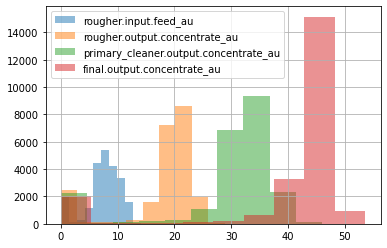

In [ ]:
plot_conc('au')

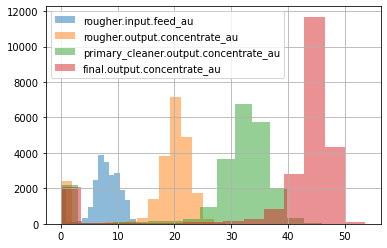

In [ ]:
stages = [
    'rougher.input.feed_',
    'rougher.output.concentrate_',
    'primary_cleaner.output.concentrate_',
    'final.output.concentrate_'
]
stages_name = []
for i in range(len(stages)):
    stages_metal = (stages[i]+'au')
    stages_name.append(stages_metal)
    full[stages_metal].hist(alpha=0.5, bins= 15)
plt.legend(stages_name)

In [ ]:
def plot_conc(metal):
    stages_name = []
    for i in range(len(stages)):
        stages_metal = (stages[i]+metal)
        stages_name.append(stages_metal)
        full[stages_metal].hist(alpha=0.5, bins= 15)
    if metal == 'au':
        nama = 'Emas'
    elif metal == 'ag':
        nama = 'Perak'
    elif metal == 'pb':
        nama = 'Timbal'
    plt.legend(stages_name)
    plt.title(f'Konsentrasi {nama} disetiap tahap')
    plt.xlabel('Konsentrasi')
    plt.ylabel('Jumlah')

#### Aurum ('Au', Emas)

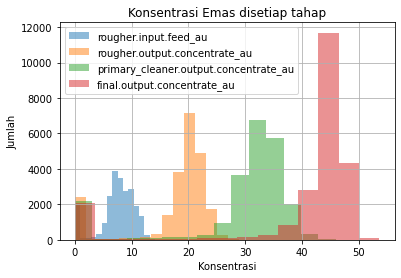

In [ ]:
plot_conc('au')

Terlihat bahwa disetiap tahap ekstraksi emas, konsentrasi emas selalu meningkat. Hal ini terjadi karena memang tujuan dari proses ini adalah ekstraksi emas, jadi semakin akhir proses yang sudah dijalani, maka semakin meningkat juga konsentrasi yang didapatkan.

#### Argentum ('Ag', Perak)

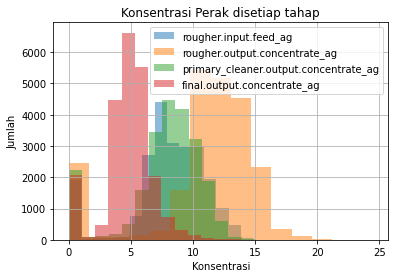

In [ ]:
plot_conc('ag')

Terlihat bahwa semakin akhir proses yang dijalani maka semakin kecil juga konsentrasinya. Mungkin ada sedikit pertanyaan mengapa saat ke rougher.output nilai konsentrasinya meningkat? Hal ini terjadi karena perak mengalami flotation juga seperti emas sehingga logam perak juga ikut terseret ke tahap selanjutnya dan konsentrasinya menurun karena ada purification yang sifatnya memang menurunkan kadar metal lain selain emas.

#### Plumbum ('Pb', Timbal)

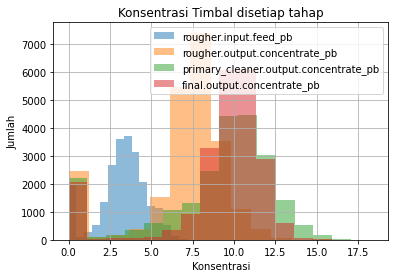

In [ ]:
plot_conc('pb')

Disini ada sedikit kejanggalan bukan karena dalam proses ekstraksi emas mengapa timbal juga ikut meningkat konsenstrasinya?, dilihat dari semua tahap, bahwa konsentrasi timbal selalu meningkat. Untuk lebih detailnya saya kurang faham karena saya bukan ahli kimia, namun ada sedikit informasi bahwa pada jaman dulu, para alkimia ingin melakukan [transmutasi](https://www.scientificamerican.com/article/fact-or-fiction-lead-can-be-turned-into-gold/) timbal menjadi emas. Mungkin karena nomor atomnya berdekatan sehingga bisa ditransmutasi dengan mengurangi nomor atom timbal menjadi sama dengan emas.

In [ ]:
#kalau ada edward elric mungkin bisa hehe

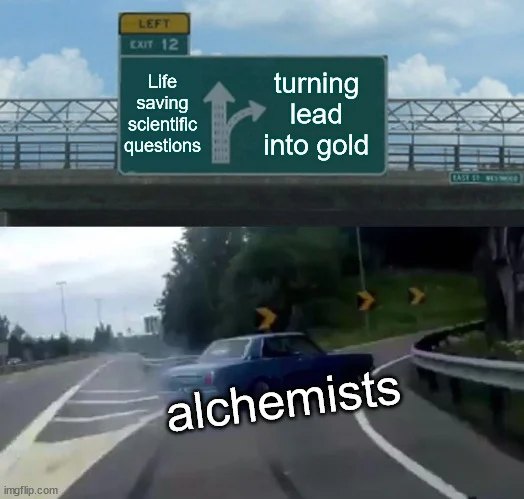

### Training & Test Dataset Data Distribution

Sebelum masuk lebih lanjut ke pemodelan machine learning, dibutuhkan pengecekan tentang distribusi data dari training dengan test. Distribusi ini harus "mirip" satu sama lain karena jika tidak maka salah satu data tidak mewakili keseluruhan data yang ada.

Text(0.5, 1.0, 'Sebaran Data antara Train dan Test')

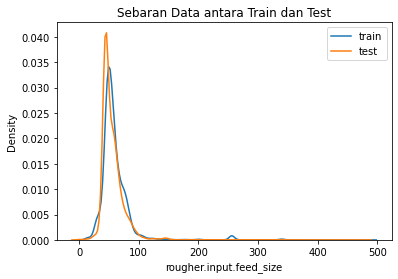

In [ ]:
sb.kdeplot(train_wo_null['rougher.input.feed_size'])
sb.kdeplot(test_wo_null['rougher.input.feed_size'])
plt.legend(['train','test'])
plt.title('Sebaran Data antara Train dan Test')

Sebaran data pada dataset train dan test tidak terlalu jauh, sehingga kedua data ini bisa merepresentasikan keseluruhan data.

### Concentration Distribution on Different Stages

In [ ]:
metal_mix = ['au','ag','pb','sol']

In [ ]:
def stages_conc(stagez,dataset):
    columns_name = []
    for i in range(len(metal_mix)):
        columns = stagez+'_'+metal_mix[0]
        columns_name.append(columns)
    dataset[columns_name].sum(1).hist(bins=50)
    plt.title(stagez)

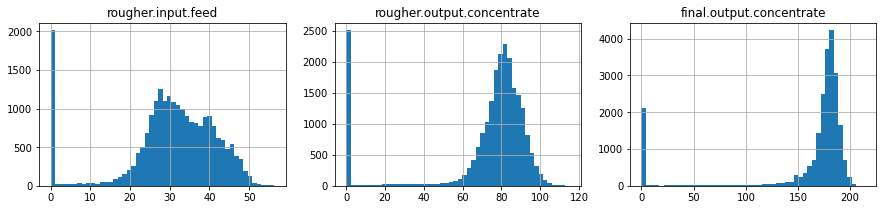

In [ ]:
plt.figure(figsize=(15,3))
extraction_stages = ['rougher.input.feed','rougher.output.concentrate','final.output.concentrate']
a=1
for i in extraction_stages:
    plt.subplot(1,3,a)
    stages_conc(i,full)
    a+=1
plt.show()    

Dilihat dari ketiga grafik diatas bahwa ada anomali yang terjadi dalam data yaitu nilai 0 yang sangat tinggi. Untuk mengeliminasi anomali tersebut digunakan threshold sehingga nilai dibawah threshold tidak akan ikut diproses.

### Eliminating Anomalies

Pertama kita eliminasi terlebih dahulu anomali dimana inputnya adalah 0.

In [ ]:
def eliminating_zero(dataset,metal):
    for i in extraction_stages:
        extraction_stages_metal = i+"_"+metal
        dataset = dataset.loc[dataset[extraction_stages_metal]>0.01]
    return dataset

In [ ]:
for i in metal_mix:
    train_final = eliminating_zero(train_wo_null,i)

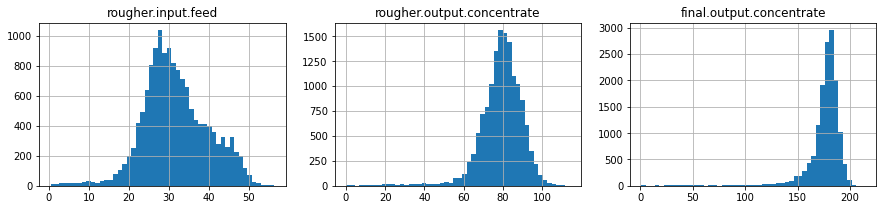

In [ ]:
plt.figure(figsize=(15,3))
a=1
for i in extraction_stages:
    plt.subplot(1,3,a)
    stages_conc(i,train_final)
    a+=1
plt.show()    

Sebelum dilanjutkan, kita cek terlebih dahulu tentang MAE nya, apakah ada perubahan?

In [ ]:
simulation_final = pd.DataFrame()
simulation_final = train_final

In [ ]:
simulation_final['simulation'] = ((C*(F-T))/(F*(C-T)))*100


In [ ]:
mae_rough_recovery = (simulation_final['simulation'] - simulation_final['rougher.output.recovery']).abs().mean()
print(f'Mean Absolute Error dari rough recovery adalah {mae_rough_recovery}')

Mean Absolute Error dari rough recovery adalah 10.257880200394945


In [ ]:
simulation_final['simulation'].mean()

76.35364533076682

In [ ]:
simulation_final['rougher.output.recovery'].mean()

84.18384685048667

Setelah anomali disingkirkan, nilai MAE nya menjadi 10, nilai yang cukup besar namun masuk akal. Dengan perbedaan rata ratanya yang menjadi 8.

In [ ]:
print(f'{(1 - (len(train_final)/len(train)))*100:.2f}% data dihilangkan untuk menghilangkan anomali')

13.71% data dihilangkan untuk menghilangkan anomali


In [ ]:
train_final.shape

(14549, 88)

In [ ]:
train.shape

(16860, 88)

Perbedaannya hanya sedikit sehingga bisa dilanjutkan

In [ ]:
for i in metal_mix:
    full_final = eliminating_zero(full_wo_null,i)

## Machine Learning Modelling

Setelah data sukses diperbaiki dan siap dipakai, selanjutnya adalah melakukan modelling machine learning. Pemodelan akan dilakukan menggunakan 2 jenis model untuk mengetahui model mana yang terbaik, setelah model terbaik dipilih maka akan dilakukan sanity check untuk menentukkan seberapa berhasil model yang dibuat.

Jenis model yang akan digunakan adalah:
1. Linear Regression
2. Random Forest Regressor

### Features and Target Settings

Features yang akan digunakan disini adalah kolom kolom yang ada di dataset tes, hal ini dikarenakan kolom ini dinilai sangat spesifik untuk menunjang pelatihan model, kolom kolom lainnya yang tidak digunakan sudah dijelaskan lebih rinci pada bagian 1.4 Features Checking

In [ ]:
features = test.columns.values
target = ['rougher.output.recovery','final.output.recovery']

In [ ]:
#train
features_train = train_final[features].drop(['date'], axis=1).reset_index(drop=True)
target_train = train_final[target].reset_index(drop=True)
target_train.columns = [0, 1]
features_train.shape


(14549, 52)

In [ ]:
target_train.shape

(14549, 2)

In [ ]:
target_train.head()

,0,1
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016


In [ ]:
#test
features_test = test_wo_null.drop(['date'], axis=1)
target_test = full_final[target].iloc[test.index].reset_index(drop=True)
target_test.columns = [0, 1]
target_test.shape

(5856, 2)

In [ ]:
features_test.shape

(5856, 52)

In [ ]:
target_test.head()

,0,1
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016


### Metric Evaluation

Metric Evaluation yang akan digunakan adalah sMAPE

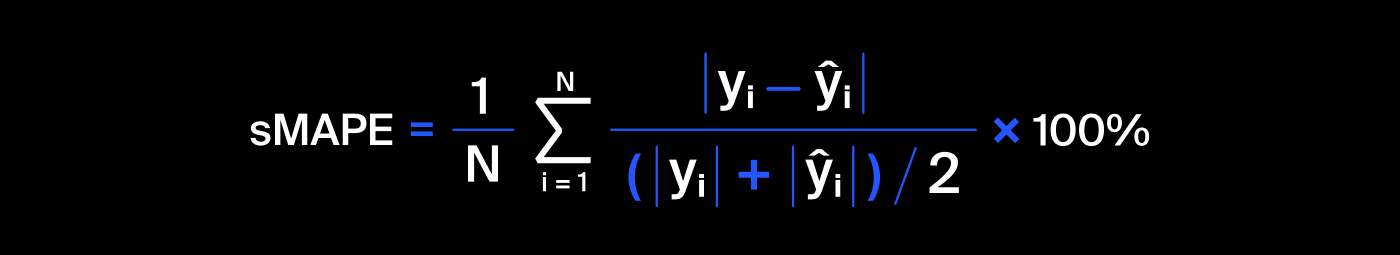

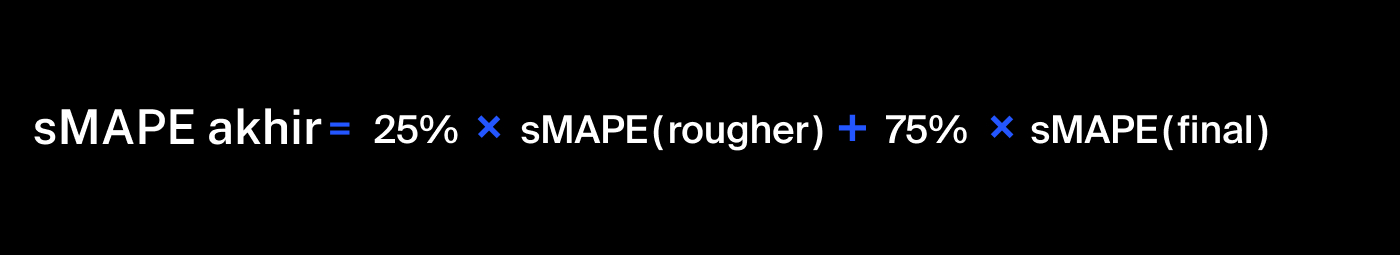

In [ ]:
def sMAPE (real,predict):
    smape = (((real-predict).abs()/((real.abs()+predict.abs())/2))).mean()
    return smape

def final_smape(real,predict):
    rougher = sMAPE(real[0], predict[0])
    final = sMAPE(real[1], predict[1])
    return 0.25 * rougher + 0.75 * final
    

In [ ]:
final_smape(target_train,target_test)

0.016362307991711646

In [ ]:
def smape_model_cross(model, cross):
    scores = []
    for train_index, valid_index in KFold(n_splits=cross).split(features_train):
        features_train_1 = features_train.loc[train_index].reset_index(drop=True)
        target_train_1 = target_train.loc[train_index].reset_index(drop=True)
        features_valid = features_train.loc[valid_index].reset_index(drop=True)
        target_valid = target_train.loc[valid_index].reset_index(drop=True)
        
        model.fit(features_train_1, target_train_1)
        predicted = pd.DataFrame(model.predict(features_valid))
        scores.append(final_smape(target_valid, predicted)) 
    return pd.Series(scores).mean()

### Linear Regression

In [ ]:
score = smape_model_cross(LinearRegression(),4)
print(f'Linear Regression mendapatkan smape: {score}')

Linear Regression mendapatkan smape: 0.10966593539829485


### Random Forest Regressor

In [ ]:
for depth in range(1, 6):
    model = RandomForestRegressor(max_depth=depth, n_estimators=50, random_state=12345)
    score = smape_model_cross(model,4)
    print(f'Random Forest dengan depth {depth}, mendapatkan smape: {score}')

Random Forest dengan depth 1, mendapatkan smape: 0.10647088958395833
Random Forest dengan depth 2, mendapatkan smape: 0.1033623020058667
Random Forest dengan depth 3, mendapatkan smape: 0.10022388585017325
Random Forest dengan depth 4, mendapatkan smape: 0.0993397517830491
Random Forest dengan depth 5, mendapatkan smape: 0.100152143060245


### Model Terbaik

Didapatkan bahwa model terbaik adalah Random Forest dengan max depth = 4. Selanjutnya dilakukan kembali tes kepada model ini menggunakan dataset test

In [ ]:
model = RandomForestRegressor(max_depth=4, n_estimators=50, random_state=12345)
model.fit(features_train, target_train)

predicted = pd.DataFrame(model.predict(features_train))
print("Dataset train:", final_smape(target_train, predicted))

predicted = pd.DataFrame(model.predict(features_test))
print("Dataset test:", final_smape(target_test, predicted))

Dataset train: 0.07645982581906025
Dataset test: 0.11081933739972338


Didapatkan nilai smape 0.11 untuk dataset test, tidak buruk, namun tidak juga bagus.

### Sanity Check

Selanjutnya dilakukan sanity check pada model

In [ ]:
smape_model_cross(DummyRegressor(), 4)

0.10510299015128316

In [ ]:
model = DummyRegressor()
model.fit(features_train, target_train)
predicted = pd.DataFrame(model.predict(features_train))
print("Dataset train:", final_smape(target_train, predicted))

predicted = pd.DataFrame(model.predict(features_test))
print("Dataset test:", final_smape(target_test, predicted))

Dataset train: 0.10032891960084431
Dataset test: 0.09563122205133726


Terlihat bahwa nilai dari Dummy Regressor bisa mencapai 0.10, memang sangat dekat dengan score dari model yang kita buat dan dengan dataset test, scorenya mencapai nilai 0.95, namun di dataset train (pelatihan) nilainya kalah telak dengan model random forest yang dibuat, jadi model Random Forest "sedikit" lebih baik dibanding model dummy.

# Kesimpulan

Dari proyek diatas disimpulkan bahwa
1. Dari Linear Regression dengan Random Forest Regressor, model yang terbaik adalah Random Forest Regressor
2. Ketika dilakukan Sanity Check, model dummy sangat kompetitif sekali dan mendapatkan skor yang bersaing dengan model Random Forest
3. Dibutuhkan model baru yang bisa lebih baik dibanding Random Forest Regressor pada proyek ini